<a href="https://colab.research.google.com/github/wjdqlsdlsp/My-Visualization/blob/main/Analyze_my_grade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import pandas as pd
import matplotlib.pyplot  as plt

### 이곳에 파일 이름 입력해주세요

In [83]:
file_name = "/content/기이수성적조회_20210804 (1).xlsx"

In [84]:
data = pd.read_excel(file_name)
columns = list(data.iloc[1])
data = data[3:]
data.columns = columns
data = data.fillna('')

In [85]:
필수_졸업학점_지능기전 = {"전필": 37, "전선" : 35, "총합" : 130}

In [86]:
data['학점'] = pd.to_numeric(data['학점'])
data['평점'] = pd.to_numeric(data['평점'])

### 이수하지 못한 과목

In [87]:
data[(data['등급'] == 'NP') | (data['등급'] == 'F') | (data['등급'] == 'FA')]

,순번,년도,학기,학수번호,교과목명,이수구분,교직영역,선택영역,학점,평가방식,등급,평점,개설학과코드
35,33,2017,1학기,008364,세종사회봉사1,교필,,인성과창의력,1,P/NP,NP,0.0,9001


In [88]:
drop_index = data[(data['등급'] == 'NP') | (data['등급'] == 'F') | (data['등급'] == 'FA')].index

In [89]:
data = data.drop(drop_index)

In [90]:
data

,순번,년도,학기,학수번호,교과목명,이수구분,교직영역,선택영역,학점,평가방식,등급,평점,개설학과코드
3,1,2021,1학기,003284,컴퓨터네트워크,전필,,,3,GRADE,A0,4.0,3232
4,2,2021,1학기,004599,통신시스템,전선,,,3,GRADE,A+,4.5,3232
5,3,2021,1학기,004763,과학사,교선1,,자연과과학기술,3,GRADE,B0,3.0,9005
6,4,2021,1학기,010000,기계학습,전필,,,3,GRADE,A+,4.5,3232
7,5,2021,1학기,010132,유니스토리,교선1,,자연과과학기술,3,GRADE,B+,3.5,9005
8,6,2021,1학기,010227,컴퓨터구조및운영체제,전필,,,3,GRADE,A+,4.5,3231
9,7,2020,2학기,005246,신호및시스템,전선,,,3,GRADE,A+,4.5,3232
10,8,2020,2학기,006237,웹프로그래밍,전선,,,3,GRADE,A+,4.5,3232
11,9,2020,2학기,008932,동양고전강독2,교선1,,사상과역사,1,P/NP,P,0.0,9005
12,10,2020,2학기,009489,세계사:인간과문명,교선1,,사상과역사,3,GRADE,B+,3.5,9005


In [91]:
groupby_score = data.groupby('이수구분')['학점'].sum()
groupby_score

이수구분
교선1    18
교선2     4
교필     11
기교      9
전선     18
전필     37
Name: 학점, dtype: int64

In [92]:
교양 = ['교선1', '교선2', '교필', '기교']

In [93]:
교양_학점 = sum(groupby_score[교양])
전선_학점 = groupby_score['전선']
전필_학점 = groupby_score['전필']
총이수학점 = 교양_학점 + 전선_학점 + 전필_학점

In [107]:
필수_졸업학점_지능기전['전선']

{'전선': 35, '전필': 37, '총합': 130}

In [118]:
import matplotlib.gridspec as gridspec

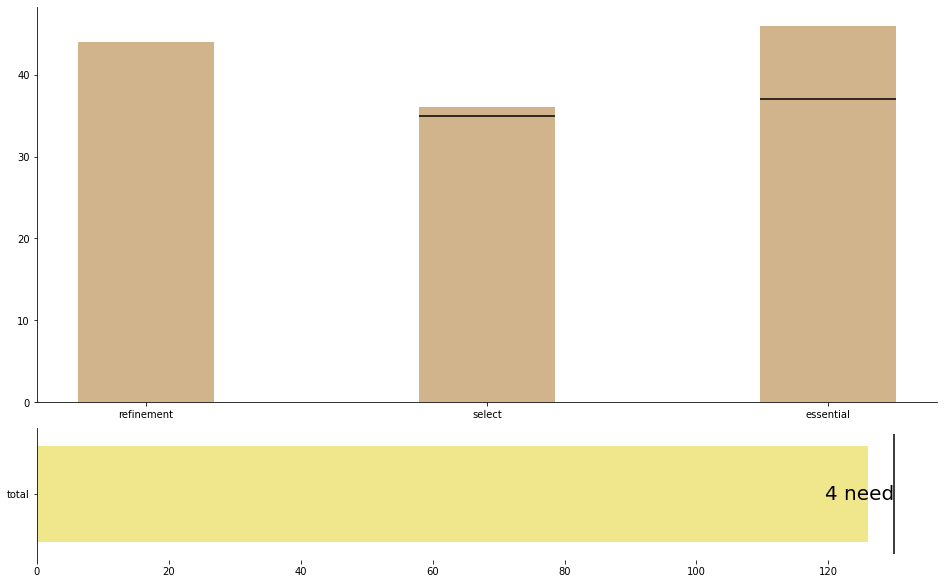

In [170]:
fig2 = plt.figure(figsize=(13,8),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[:3, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])

f2_ax1.bar(x=['refinement', 'select', 'essential'], height= [교양_학점, 전선_학점, 전필_학점],width =0.4 ,color = 'tan' )
f2_ax1.spines['right'].set_visible(False)
f2_ax1.spines['top'].set_visible(False)
f2_ax1.hlines(필수_졸업학점_지능기전['전선'], 0.8,1.2)
f2_ax1.hlines(필수_졸업학점_지능기전['전필'], 1.8,2.2)

if 필수_졸업학점_지능기전['전선']> 전선_학점:
    value = f"{필수_졸업학점_지능기전['전선'] - 전선_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전선']+1,va='center', ha='center',fontsize=20)

if 필수_졸업학점_지능기전['전필']> 전필_학점:
    value = f"{필수_졸업학점_지능기전['전필'] - 전필_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전필']+1,va='center', ha='center',fontsize=20)

f2_ax2.barh(y='total', width=총이수학점, color = 'khaki')
f2_ax2.spines['top'].set_visible(False)
f2_ax2.spines['right'].set_visible(False)
f2_ax2.spines['bottom'].set_visible(False)
f2_ax2.vlines(필수_졸업학점_지능기전['총합'],-0.5,0.5)

if 필수_졸업학점_지능기전['총합']> 총이수학점:
    value = f"{필수_졸업학점_지능기전['총합'] - 총이수학점} need"
    f2_ax2.text(s=value, x=필수_졸업학점_지능기전['총합'],y=0,va='center', ha='right',fontsize=20)

### 이번학기 듣는거 더하면?

In [172]:
# 4전공 듣는게 맞냐...?
교양_학점 = sum(groupby_score[교양]) + 2
전선_학점 = groupby_score['전선'] + 6 + 3 + 3 + 3
전필_학점 = groupby_score['전필'] + 3
총이수학점 = 교양_학점 + 전선_학점 + 전필_학점

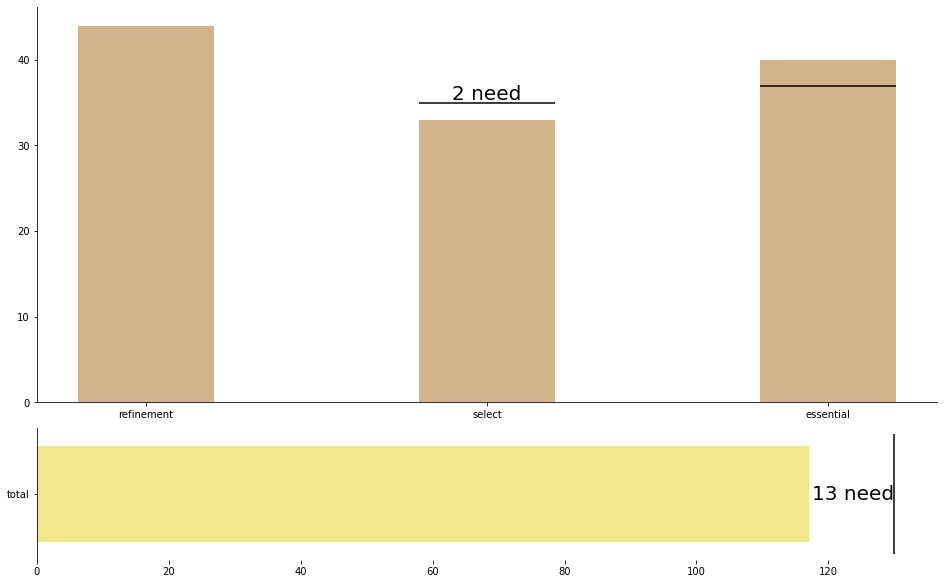

In [173]:
fig2 = plt.figure(figsize=(13,8),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[:3, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])

f2_ax1.bar(x=['refinement', 'select', 'essential'], height= [교양_학점, 전선_학점, 전필_학점],width =0.4 ,color = 'tan' )
f2_ax1.spines['right'].set_visible(False)
f2_ax1.spines['top'].set_visible(False)
f2_ax1.hlines(필수_졸업학점_지능기전['전선'], 0.8,1.2)
f2_ax1.hlines(필수_졸업학점_지능기전['전필'], 1.8,2.2)

if 필수_졸업학점_지능기전['전선']> 전선_학점:
    value = f"{필수_졸업학점_지능기전['전선'] - 전선_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전선']+1,va='center', ha='center',fontsize=20)

if 필수_졸업학점_지능기전['전필']> 전필_학점:
    value = f"{필수_졸업학점_지능기전['전필'] - 전필_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전필']+1,va='center', ha='center',fontsize=20)

f2_ax2.barh(y='total', width=총이수학점, color = 'khaki')
f2_ax2.spines['top'].set_visible(False)
f2_ax2.spines['right'].set_visible(False)
f2_ax2.spines['bottom'].set_visible(False)
f2_ax2.vlines(필수_졸업학점_지능기전['총합'],-0.5,0.5)

if 필수_졸업학점_지능기전['총합']> 총이수학점:
    value = f"{필수_졸업학점_지능기전['총합'] - 총이수학점} need"
    f2_ax2.text(s=value, x=필수_졸업학점_지능기전['총합'],y=0,va='center', ha='right',fontsize=20)

### 4학년 예상

In [174]:
교양_학점 = sum(groupby_score[교양]) + 2 + 4 # 교양 2개
전선_학점 = groupby_score['전선'] + 6 + 3 + 3 + 3 + 3 #전선하나
전필_학점 = groupby_score['전필'] + 3 +6 # 캡스톤
총이수학점 = 교양_학점 + 전선_학점 + 전필_학점

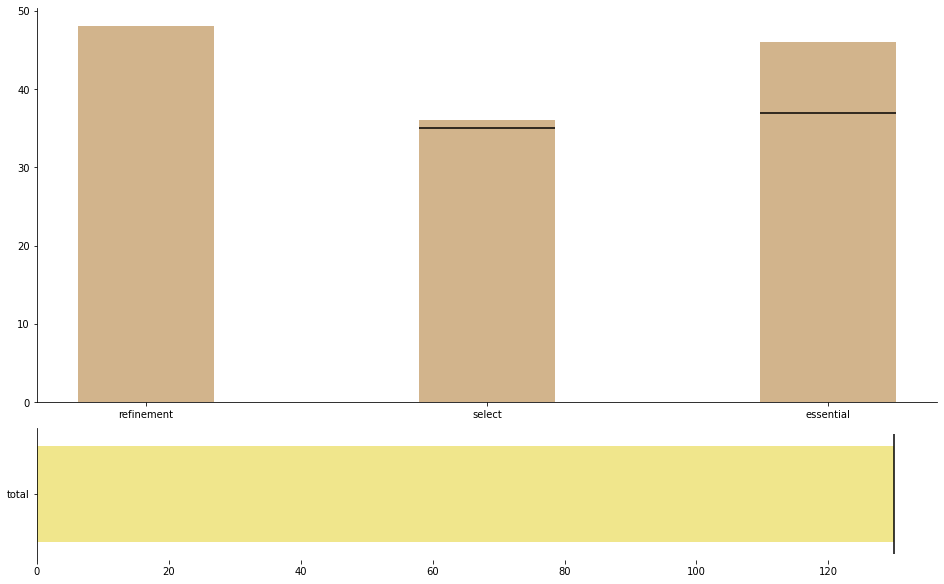

In [175]:
fig2 = plt.figure(figsize=(13,8),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=4, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[:3, 0])
f2_ax2 = fig2.add_subplot(spec2[3, 0])

f2_ax1.bar(x=['refinement', 'select', 'essential'], height= [교양_학점, 전선_학점, 전필_학점],width =0.4 ,color = 'tan' )
f2_ax1.spines['right'].set_visible(False)
f2_ax1.spines['top'].set_visible(False)
f2_ax1.hlines(필수_졸업학점_지능기전['전선'], 0.8,1.2)
f2_ax1.hlines(필수_졸업학점_지능기전['전필'], 1.8,2.2)

if 필수_졸업학점_지능기전['전선']> 전선_학점:
    value = f"{필수_졸업학점_지능기전['전선'] - 전선_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전선']+1,va='center', ha='center',fontsize=20)

if 필수_졸업학점_지능기전['전필']> 전필_학점:
    value = f"{필수_졸업학점_지능기전['전필'] - 전필_학점} need"
    f2_ax1.text(s=value, x='select',y=필수_졸업학점_지능기전['전필']+1,va='center', ha='center',fontsize=20)

f2_ax2.barh(y='total', width=총이수학점, color = 'khaki')
f2_ax2.spines['top'].set_visible(False)
f2_ax2.spines['right'].set_visible(False)
f2_ax2.spines['bottom'].set_visible(False)
f2_ax2.vlines(필수_졸업학점_지능기전['총합'],-0.5,0.5)

if 필수_졸업학점_지능기전['총합']> 총이수학점:
    value = f"{필수_졸업학점_지능기전['총합'] - 총이수학점} need"
    f2_ax2.text(s=value, x=필수_졸업학점_지능기전['총합'],y=0,va='center', ha='right',fontsize=20)